In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [9]:
%matplotlib inline

In [10]:
cf.go_offline()

In [11]:
train_data = pd.read_csv('titanic_train.csv')

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check for missing data first

In [14]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### here *True* indicates that a NaN (Empty) value is present
To plot is we gonna use heat map in sns

In [15]:
# sns.heatmap(train_data.isnull())
# train_data.isnull().iplot(kind='heatmap', colorscale='spectral')
train_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

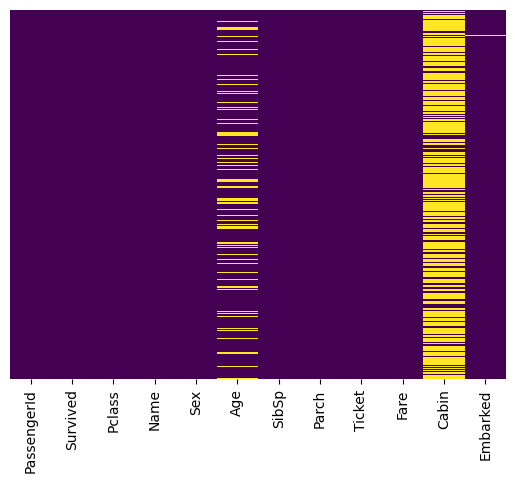

In [16]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
nullAge = train_data[train_data['Age'].isnull()]['PassengerId'].count()
total = train_data['PassengerId'].count()

nullAgePercent = (nullAge / total) * 100;
nullAgePercent

19.865319865319865

In [18]:
nullCabin = train_data[train_data['Cabin'].isnull()]['PassengerId'].count()

nullCabinPercent = (nullCabin / total) * 100
nullCabinPercent

77.10437710437711

### Observations
This means that 
- around 20% of age data is empty
- around 77% of cabin data is empty 

\
We wanna use some useful with it

In [19]:
sns.set_style('whitegrid')

### Getting count for 
- who survived
- who didn't survived

\
its always a good idea to check the ratio of the actual target labels

<Axes: xlabel='Survived', ylabel='count'>

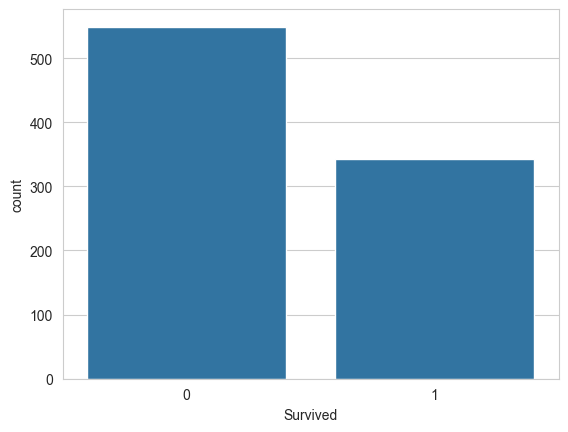

In [20]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

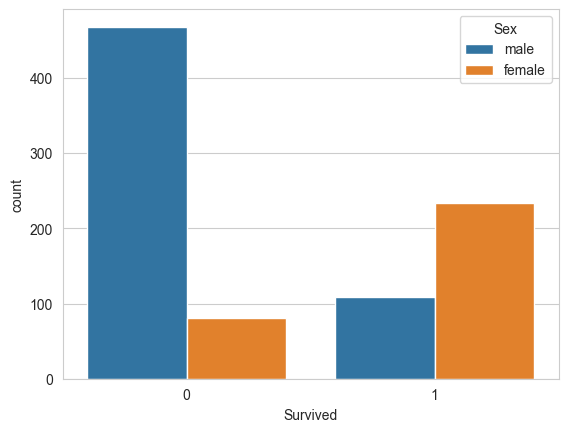

In [21]:
sns.countplot(x='Survived', data=train_data, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

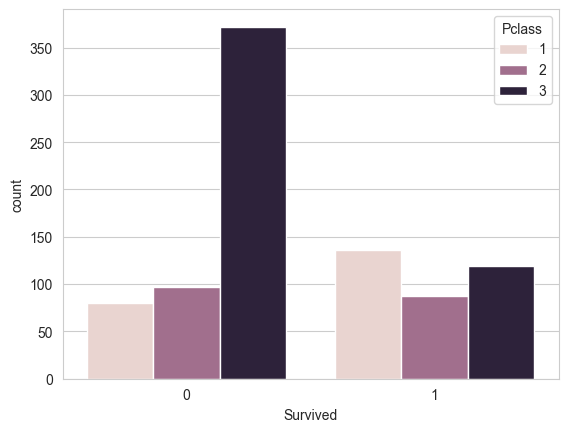

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

<Axes: xlabel='Age', ylabel='Count'>

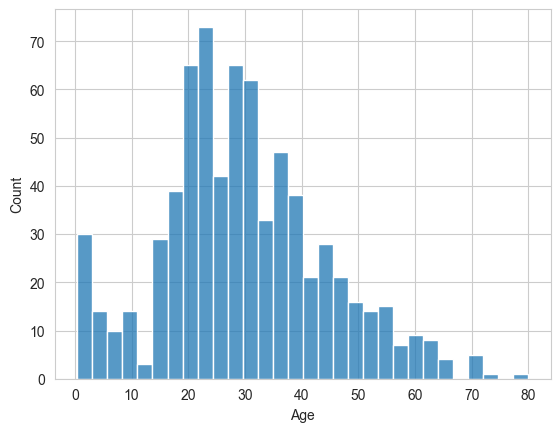

In [23]:
sns.histplot(train_data['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

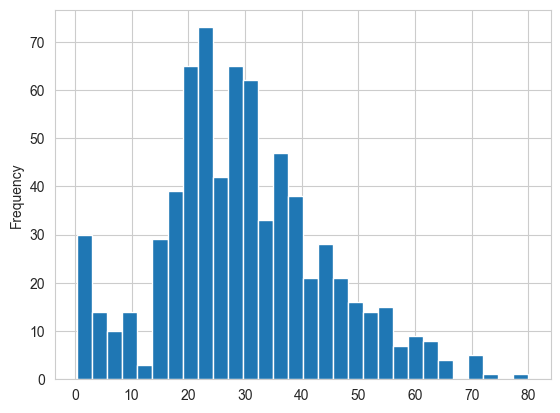

In [24]:
train_data['Age'].plot.hist(bins=30)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

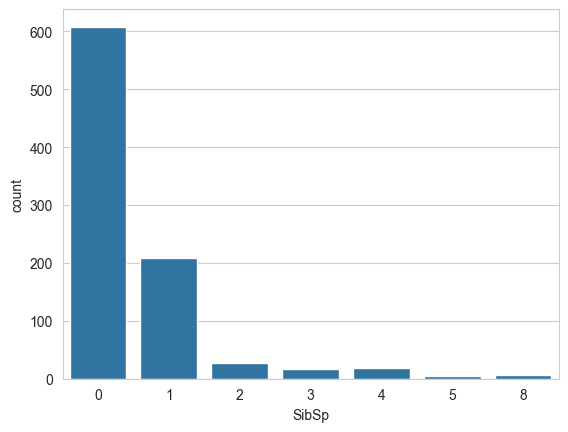

In [26]:
sns.countplot(x='SibSp',data=train_data)

<Axes: xlabel='SibSp', ylabel='count'>

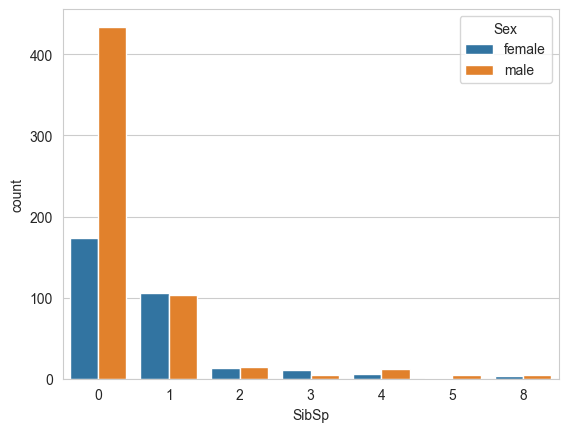

In [27]:
sns.countplot(x='SibSp', hue='Sex', data=train_data)

<Axes: xlabel='Fare', ylabel='Count'>

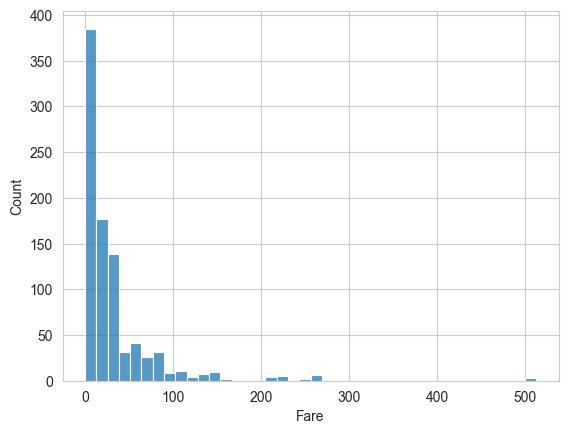

In [28]:
sns.histplot(data=train_data['Fare'].dropna(), bins=40)

In [29]:
import cufflinks as cf

In [30]:
cf.go_offline()

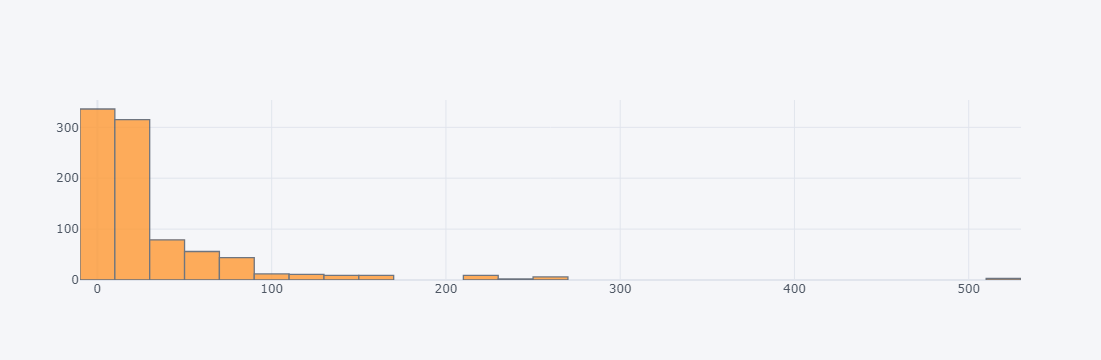

In [31]:
train_data['Fare'].iplot(kind='hist', bins=30)

# Cleaning Data Now

<Axes: xlabel='Pclass', ylabel='Age'>

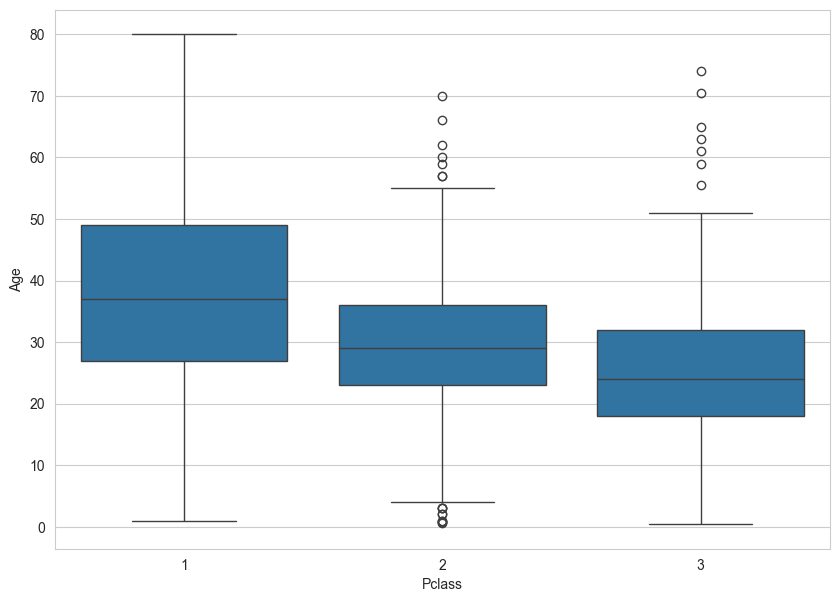

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train_data)

In [33]:
round(train_data[train_data['Pclass']==3]['Age'].mean(), 0)

25.0

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    age1 = round(train_data[train_data['Pclass'] == 3]['Age'].mean(), 0)
    age2 = round(train_data[train_data['Pclass'] == 2]['Age'].mean(), 0)
    age3 = round(train_data[train_data['Pclass'] == 1]['Age'].mean(), 0)
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return age1
        
        elif Pclass == 2:
            return age2
        
        else:
            return age3
        
    else:
        return Age

In [35]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_29056\1662584085.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_29056\1662584085.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

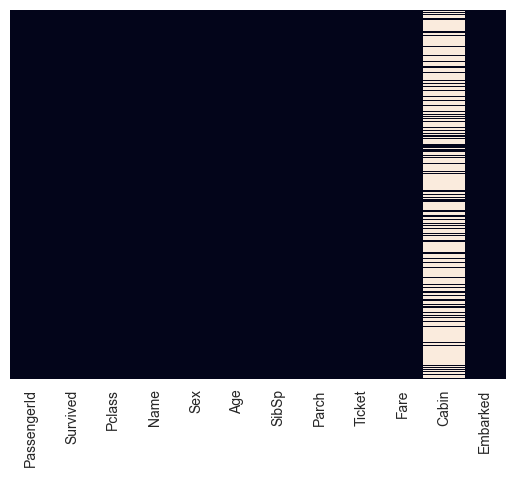

In [36]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [37]:
train_data.drop('Cabin', axis=1, inplace=True)

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

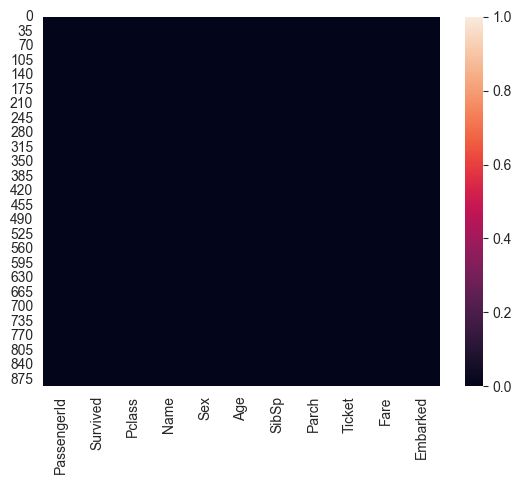

In [39]:
sns.heatmap(data=train_data.isnull())

# Dealing with Missing values done!
first step of cleaning data is completed!

**_________________________________________________________________________________________________**

# Now creating Dummy variables
using pandas

In [40]:
# Convert categorical variable into dummy/indicator variables.
pd.get_dummies(train_data['Sex'])
# Using this will be a perfect predictor for male and female since 
# Algorithm will know it

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [41]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)

In [42]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [43]:
embark = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [44]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [45]:
pclass = pd.get_dummies(train_data['Pclass'], drop_first = True)
pclass

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [46]:
train_data = pd.concat([train_data, sex, embark, pclass], axis=1)

In [47]:
# train_data.drop([2], axis=1, inplace=True)

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


## Dummy variables of sex and embarked has been added
this means now we don't need other columns
\
what we can do is remove those columns which were used to create dummy variables
- We remove mostly **String** variables because it can not be understand by our ml algo
- To do so we use dummy variables
- Now for ticket we can use *Feature Engineering* but its concept of NLP

In [49]:
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [50]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,True,False,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,False,False
4,5,0,35.0,0,0,8.0500,True,False,True,False,True


In [51]:
# converting 2 and 3 class feature name into string
train_data.rename(columns={2:'2', 3:'3'}, inplace=True)

In [52]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,True,False,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,False,False
4,5,0,35.0,0,0,8.0500,True,False,True,False,True


### A perfect data for machine learning algorithm
- All the data are numeric or boolean
- Required **String** Data is concatenated nicely
- And column cleaning (Filling up dummy averages) is successfull

In [53]:
# Since passenger Id is indexing only and play no role for predicitions
train_data.drop(['PassengerId'], inplace=True, axis=1)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [54]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


# Training Testing and Spliting

In [55]:
x = train_data.drop('Survived', axis=1) # Everything else here will be features
y = train_data['Survived'] # prediciting 0 or 1 in survived columns

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
 4   male    891 non-null    bool   
 5   Q       891 non-null    bool   
 6   S       891 non-null    bool   
 7   2       891 non-null    bool   
 8   3       891 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 32.3 KB


In [57]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)

In [130]:
x_train.head()
# x_train.count()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
520,30.0,0,0,93.5000,False,False,True,False,False
510,29.0,0,0,7.7500,True,True,False,False,True
446,13.0,0,1,19.5000,False,False,True,True,False
2,26.0,0,0,7.9250,False,False,True,False,True
691,4.0,0,1,13.4167,False,False,False,False,True


In [131]:
y_train.count()

623

In [132]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

### Now its time to train the model
For logistic regression we will grab it from linear family

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [134]:
from sklearn.naive_bayes import GaussianNB
mode1=GaussianNB()
mode1.fit(x_train,y_train)
mode1.score(x_test,y_test)

0.7985074626865671

In [125]:
mode1.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0], dtype=int64)

### Done 
And we are done with model.....
\
As we can see maximum work was to clean the dataset and that's the reflection of real world problem
\
Now for evaluations we will add classification_report from metrics
\
This will tell us...
- Accuracy
- precision
- recall values
- F1 score
\
> So that you don't have to read out confusion matrix

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       159
           1       0.81      0.73      0.77       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [76]:
# For confusion matrix

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, pred)

array([[140,  19],
       [ 29,  80]], dtype=int64)

In [79]:
cfm = pd.DataFrame(data=confusion_matrix(y_test, pred), index=['TP', 'TN'], columns=['TN','FN'])
cfm

,TN,FN
TP,140,19
TN,29,80


# Now Real Testing (with test.csv)

In [81]:
test_data = pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

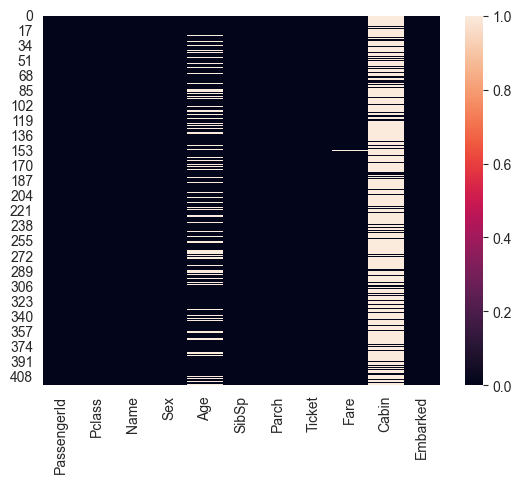

In [82]:
sns.heatmap(test_data.isnull())

In [83]:
test_data.drop(['Cabin'], inplace=True, axis=1)

<Axes: >

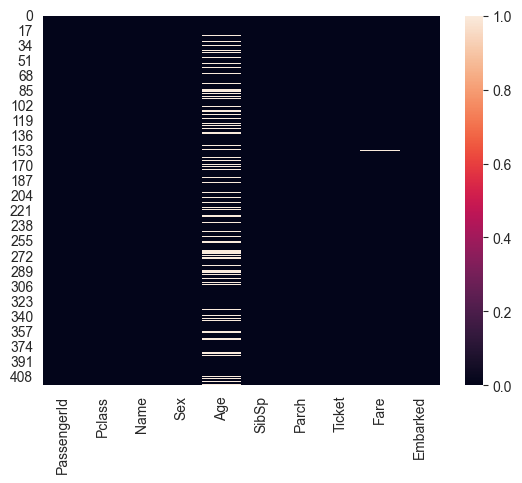

In [84]:
sns.heatmap(test_data.isnull())

In [85]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


## For Fare
Since person belongs to **`Class 3`**, we will take average fare of class 3 and put it here

In [86]:
avg3 = test_data[test_data['Pclass'] == 3]['Fare'].mean()
avg3

12.459677880184334

In [87]:
test_data['Fare'][152] = avg3


C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_29056\115724375.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [88]:
test_data['Fare'][152]

12.459677880184334

In [89]:
def impute_age2(cols):
    Age = cols[0]
    Pclass = cols[1]
    age1 = round(test_data[test_data['Pclass'] == 3]['Age'].mean(), 1)
    age2 = round(test_data[test_data['Pclass'] == 2]['Age'].mean(), 1)
    age3 = round(test_data[test_data['Pclass'] == 1]['Age'].mean(), 1)
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return age1
        
        elif Pclass == 2:
            return age2
        
        else:
            return age3
        
    else:
        return Age

In [90]:
# Using our old function
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age2, axis=1)


C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_29056\155798714.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\SHANTANU\AppData\Local\Temp\ipykernel_29056\155798714.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

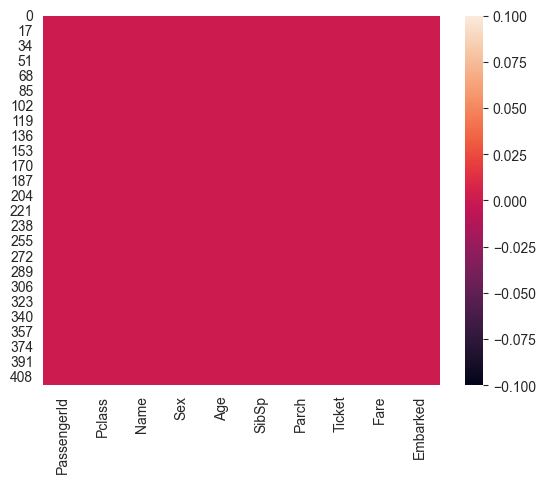

In [91]:
sns.heatmap(test_data.isnull())

In [92]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [93]:
sexT = pd.get_dummies(test_data['Sex'], drop_first=True)
embarkT = pd.get_dummies(test_data['Embarked'], drop_first = True)
pclassT = pd.get_dummies(test_data['Pclass'], drop_first = True)


In [94]:
test_data = pd.concat([test_data, sexT, embarkT, pclassT], axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,True,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,True,False,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,False,True,False,True


In [95]:
test_data.rename(columns={2:'2', 3:'3'}, inplace=True)

In [96]:
test_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,True,True,False,False,True
1,893,47.0,1,0,7.0000,False,False,True,False,True
2,894,62.0,0,0,9.6875,True,True,False,True,False
3,895,27.0,0,0,8.6625,True,False,True,False,True
4,896,22.0,1,1,12.2875,False,False,True,False,True


In [97]:
test_data.drop(['PassengerId'], inplace=True, axis=1)

In [98]:
test_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,True,True,False,False,True
1,47.0,1,0,7.0000,False,False,True,False,True
2,62.0,0,0,9.6875,True,True,False,True,False
3,27.0,0,0,8.6625,True,False,True,False,True
4,22.0,1,1,12.2875,False,False,True,False,True


In [99]:
x_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
26,38.00,0,0,7.2250,True,False,False,False,True
184,4.00,0,2,22.0250,False,False,True,False,True
469,0.75,2,1,19.2583,False,False,False,False,True
613,38.00,0,0,7.7500,True,True,False,False,True
606,30.00,0,0,7.8958,True,False,True,False,True


<Axes: >

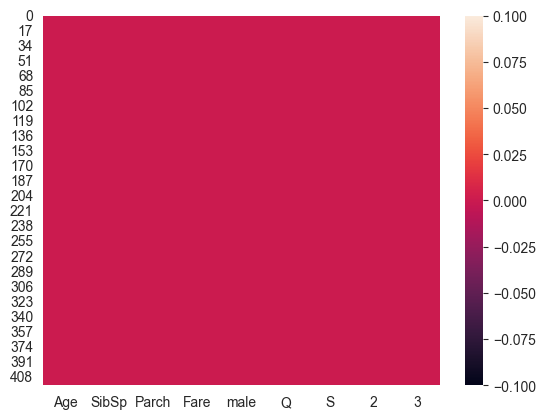

In [100]:
sns.heatmap(test_data.isnull())

# Final prediction Test

In [101]:
predTestCSV = mode1.predict(test_data)

In [102]:
from sklearn.metrics import classification_report

In [103]:
te = pd.read_csv('titanic_test.csv')
te['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [104]:
finaldf = pd.DataFrame(
    
    data = {
        'PassengerId':te['PassengerId'],
        "Survived": predTestCSV
    }

)

finaldf

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
finaldf.to_csv("predictions.csv", index=False)